# SPOTIFY TRACKS DATASET EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance

In [2]:
#Callout the dataset

df=pd.read_csv('/Users/akeweje1/Downloads/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Column Description

* track_id: The Spotify ID for the track
* artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
* album_name: The album name in which the track appears
* track_name: Name of the track
* popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
* duration_ms: The track length in milliseconds
* explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
* loudness: The overall loudness of a track in decibels (dB)
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
* track_genre: The genre in which the track belongs 

In [3]:
#Show the column types

df.dtypes.to_frame('Types')

,Types
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [4]:
#Find the  the missing values and replace with false

df.replace('?', np.nan, inplace= True)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#Callout the values

mv= df.notnull()
mv.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
#Find how many missing values I have in each colummns

for column in mv.columns.values:
    print(column)
    print (mv[column].value_counts())
    print('') 

#there is 1 missing value in artists 
#there are 21 missing values in album_name
#there is 1 missing value in track_name

Unnamed: 0
Unnamed: 0
True    114000
Name: count, dtype: int64

track_id
track_id
True    114000
Name: count, dtype: int64

artists
artists
True     113999
False         1
Name: count, dtype: int64

album_name
album_name
True     113979
False        21
Name: count, dtype: int64

track_name
track_name
True     113999
False         1
Name: count, dtype: int64

popularity
popularity
True    114000
Name: count, dtype: int64

duration_ms
duration_ms
True    114000
Name: count, dtype: int64

explicit
explicit
True    114000
Name: count, dtype: int64

danceability
danceability
True    114000
Name: count, dtype: int64

energy
energy
True    114000
Name: count, dtype: int64

key
key
True    114000
Name: count, dtype: int64

loudness
loudness
True    114000
Name: count, dtype: int64

mode
mode
True    114000
Name: count, dtype: int64

speechiness
speechiness
True    114000
Name: count, dtype: int64

acousticness
acousticness
True    114000
Name: count, dtype: int64

instrumentalness
instrumental

In [7]:
#Since I am not dealing with too much missing values, I shall remove them since they're categorical, it wont affect our accuracy

import re

In [8]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
df.dropna(subset=['artists'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.dropna(subset=['album_name'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.dropna(subset=['track_name'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
#Show us the number of rows and columns

df.shape

(113979, 20)

In [13]:
#Check for duplicate

df[df.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111225,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111341,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111959,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112947,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [14]:
df.drop_duplicates(inplace=True)
#Dropping 450 rows duplicates

df[df.duplicated()]
#Checking for any more duplicate

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [15]:
df.shape

#This is the current rows and columns I will be working on 

(113529, 20)

In [17]:
#This is statistics of the columns

df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113529.000000,1.135290e+05,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000,113529.000000
mean,33.317531,2.280986e+05,0.567007,0.642119,5.309313,-8.243472,0.637899,0.084668,0.314046,0.155727,0.213624,0.474212,122.175956,3.904201
std,22.279336,1.064135e+05,0.173407,0.251060,3.560054,5.011732,0.480610,0.105758,0.331909,0.309238,0.190472,0.259216,29.973024,0.432153
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741930e+05,0.456000,0.473000,2.000000,-9.997000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130090e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.616000e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [16]:
#Types of track genres in the dataset

df.groupby('track_genre').size().reset_index(name='count')

,track_genre,count
0,acoustic,1000
1,afrobeat,999
2,alt-rock,999
3,alternative,999
4,ambient,999
...,...,...
109,techno,1000
110,trance,999
111,trip-hop,997
112,turkish,999


In [36]:
top_10_track_genre = df.groupby('track_genre').size().reset_index(name='count').nlargest(10, 'count')
top_10_track_genre

,track_genre,count
0,acoustic,1000
11,british,1000
19,country,1000
25,disco,1000
32,electronic,1000
37,funk,1000
38,garage,1000
57,indie-pop,1000
58,industrial,1000
63,j-rock,1000


This top 10 genre shows the quantity of the genre tracks we have on spotify.


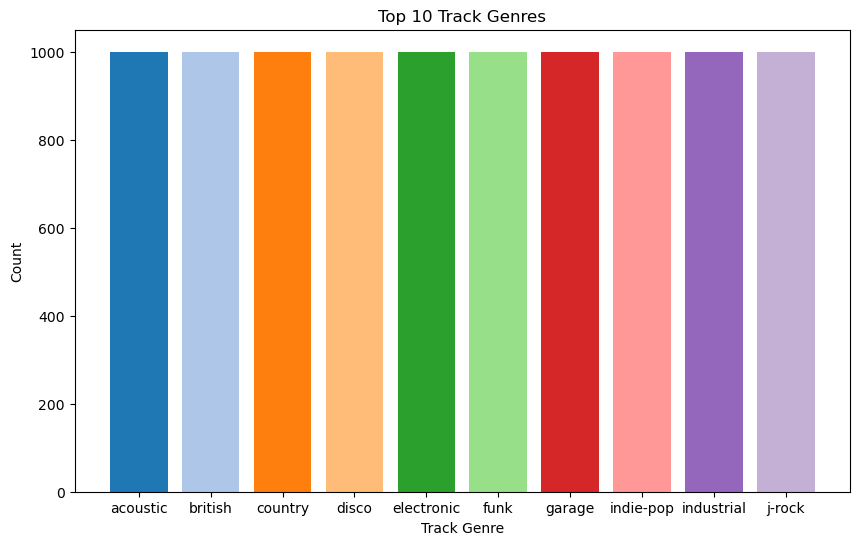

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_track_genre['track_genre'], top_10_track_genre['count'], color=plt.cm.tab20(range(10)))
plt.xlabel('Track Genre')
plt.ylabel('Count')
plt.title('Top 10 Track Genres')
plt.show()


 The summary of the central tendency, dispersion, and shape of the data, like
 The values in popularity are 113529
 The mean value is 33.3 out of 100 rating popular which we can see in max and the lowest popularity rate is 0
 Same explanation for the other columns

In [20]:
#Check the statistics of the genres by popularity

genre_popularity = df.groupby('track_genre')['popularity'].mean()

In [21]:
#Find the top 10 genre by popularity

top_genres = genre_popularity.nlargest(10)
top_genres

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
pop          47.903323
sertanejo    47.866000
emo          47.773374
Name: popularity, dtype: float64

I found the top 10 genres using the popularity column to check for it popularity, and the graph below shows us the top 10, with the top 3 genres of Pop-film, K-pop and Chill.

<Axes: xlabel='track_genre'>

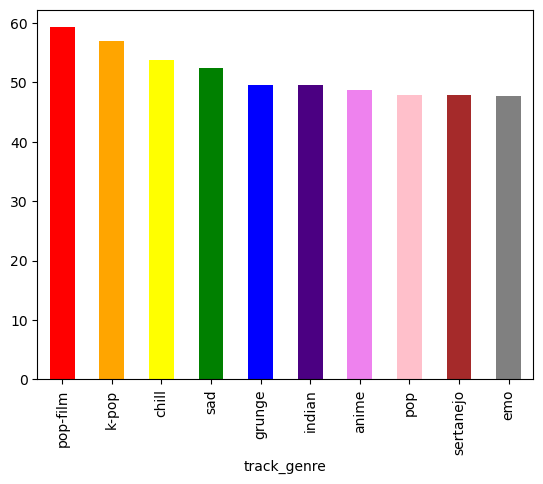

In [22]:
#Graph of the popular top 10 genres

top_genres.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'])


In [23]:
#Find the least 10 genres by popularity


least_genres = genre_popularity.nsmallest(10)
least_genres

track_genre
iranian            2.224696
romance            3.549779
latin              8.363636
detroit-techno    11.183367
chicago-house     12.333667
classical         13.519829
jazz              13.586587
grindcore         14.629259
kids              14.940464
idm               15.759519
Name: popularity, dtype: float64

I found the least top 10 genres using the popularity column to check for it popularity, and the graph below shows us the least top 10, with the least top 3 genres of Iranian, Romance, and Latin.

<Axes: xlabel='track_genre'>

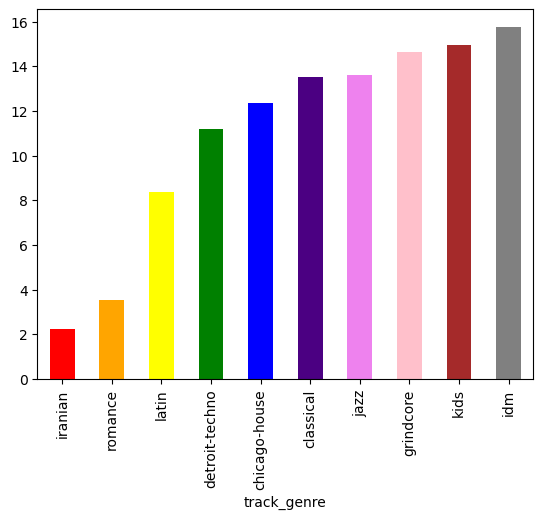

In [24]:
#Graph of the least 10 genres


least_genres.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'])

In [25]:
#find the top 10 artists based on the popularity column

artist_popularity = df.groupby('artists')['popularity'].mean()
top_10 = artist_popularity.nlargest(10)
top_10

artists
Sam Smith;Kim Petras          100.0
Bizarrap;Quevedo               99.0
Manuel Turizo                  98.0
Bad Bunny;Chencho Corleone     97.0
Bad Bunny;Bomba Estéreo        94.5
Joji                           94.0
Beyoncé                        93.0
Harry Styles                   92.0
Rema;Selena Gomez              92.0
Drake;21 Savage                91.0
Name: popularity, dtype: float64

Visualizing the top 10 artists based on the popularity chart

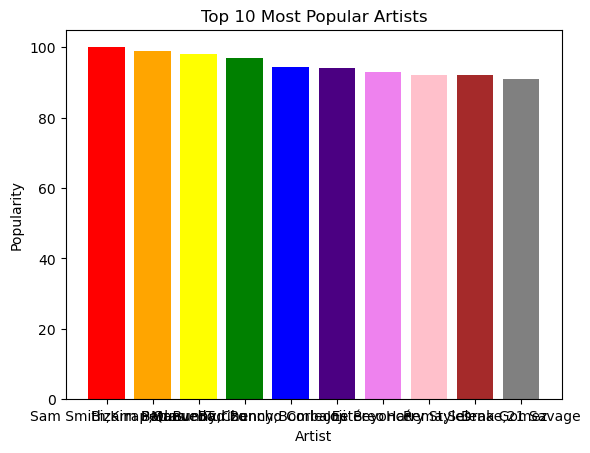

In [26]:
#Grahp showing the top 10 artist

plt.bar(top_10.index, top_10.values, color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'])
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Top 10 Most Popular Artists')
plt.show()

Artist: Sam Smith;Kim Petras Top Song: Unholy (feat. Kim Petras)
Artist: Bizarrap;Quevedo Top Song: Quevedo: Bzrp Music Sessions, Vol. 52
Artist: Manuel Turizo Top Song: La Bachata
Artist: Bad Bunny;Chencho Corleone Top Song: Me Porto Bonito
Artist: Bad Bunny;Bomba Estéreo Top Song: Ojitos Lindos
Artist: Joji Top Song: Glimpse of Us
Artist: Beyoncé Top Song: CUFF IT
Artist: Harry Styles Top Song: As It Was
Artist: Rema;Selena Gomez Top Song: Calm Down (with Selena Gomez)
Artist: Drake;21 Savage Top Song: Jimmy Cooks (feat. 21 Savage)


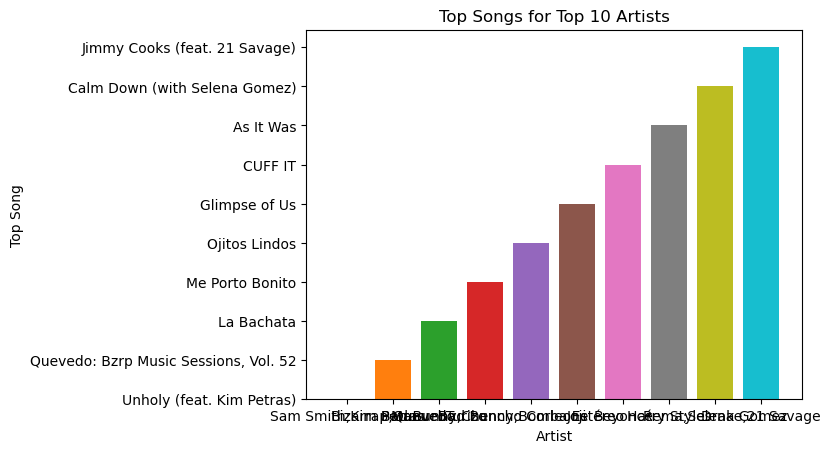

In [27]:
#find the songs that made the artists popular on spotify 

for artist in top_10.index:
    top_song = df.loc[df['artists'] == artist, 'track_name'].value_counts().index[0]
    print('Artist:', artist, 'Top Song:', top_song)
    plt.bar(artist, top_song)
    
# Plot Graph
plt.xlabel('Artist')
plt.ylabel('Top Song')
plt.title('Top Songs for Top 10 Artists')
plt.show()

In [28]:
#find the least top 10 artists based on the popularity column


top_10_least= artist_popularity.nsmallest(10)
top_10_least

artists
100 Blaze                                                   0.0
100 Blaze;Lacrim                                            0.0
1986zig                                                     0.0
1986zig;AYLIVA                                              0.0
1PLIKÉ140                                                   0.0
48th St. Collective                                         0.0
A R I Z O N A                                               0.0
ARTY;Stadiumx;Jason Walker                                  0.0
Academy of St. Martin in the Fields;Sir Neville Marriner    0.0
Adaro;Kronos                                                0.0
Name: popularity, dtype: float64

Artist: 100 Blaze Least Song: D.S.C.P
Artist: 100 Blaze;Lacrim Least Song: Phenomenal
Artist: 1986zig Least Song: Kopf aus
Artist: 1986zig;AYLIVA Least Song: 1000 Sterne
Artist: 1PLIKÉ140 Least Song: COMME BOU
Artist: 48th St. Collective Least Song: Love is in the Air
Artist: A R I Z O N A Least Song: Nostalgic
Artist: ARTY;Stadiumx;Jason Walker Least Song: Thousand Lives
Artist: Academy of St. Martin in the Fields;Sir Neville Marriner Least Song: Three German Dances, K.605: No. 3 in C, Trio "Die Schlittenfahrt"
Artist: Adaro;Kronos Least Song: Kings of the Beat - Radio Edit


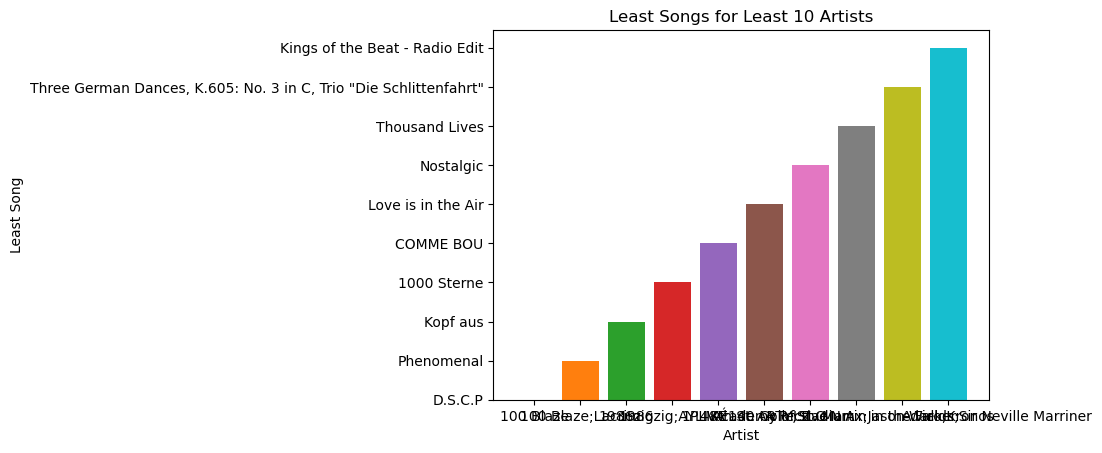

In [29]:
#find the songs that made the artists least popular on spotify 

for artist in top_10_least.index:
    least_song = df.loc[df['artists'] == artist, 'track_name'].value_counts().index[0]
    print('Artist:', artist, 'Least Song:', least_song)
    plt.bar(artist, least_song)
    
# Plot Graph
plt.xlabel('Artist')
plt.ylabel('Least Song')
plt.title('Least Songs for Least 10 Artists')
plt.show()

In [30]:
#Top 10 songs in each album

album_popularity = df.groupby('album_name')['popularity'].mean()
top_10_album = album_popularity.nlargest(10)
top_10_album

album_name
Unholy (feat. Kim Petras)                                              100.0
Quevedo: Bzrp Music Sessions, Vol. 52                                   99.0
La Bachata                                                              98.0
I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")     96.0
Indigo (Extended)                                                       96.0
PROVENZA                                                                93.0
RENAISSANCE                                                             93.0
Calm Down (with Selena Gomez)                                           92.0
Harry's House                                                           92.0
Left and Right (Feat. Jung Kook of BTS)                                 92.0
Name: popularity, dtype: float64

<Axes: xlabel='album_name'>

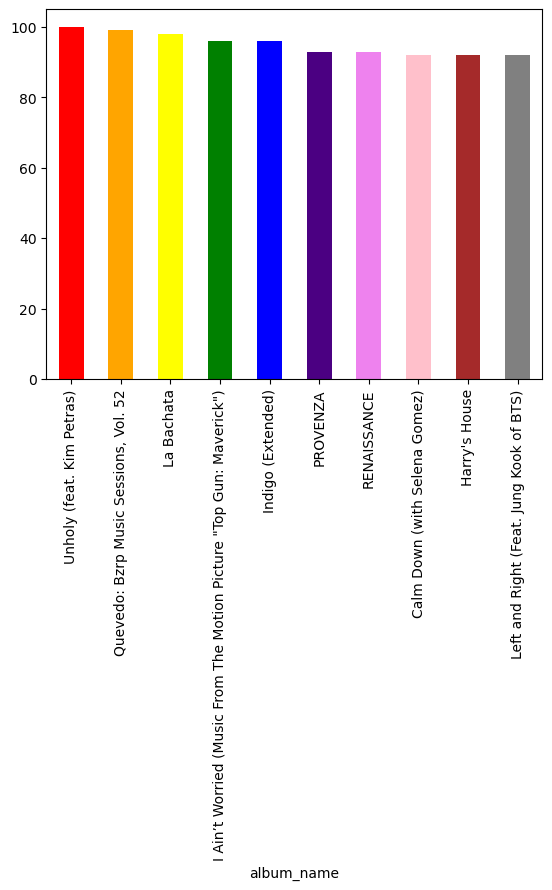

In [31]:
#Plot graph for the top_10_album

top_10_album.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'])

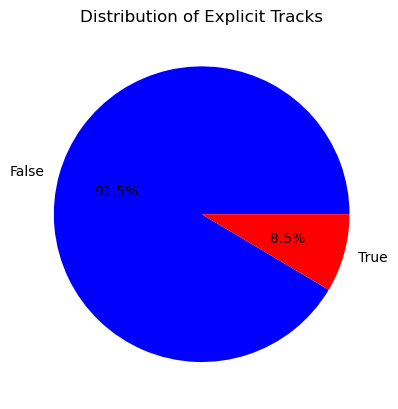

In [32]:
#Pie chart of the percentage amount of explicity in the tracks

explicit_counts = df['explicit'].value_counts()
colors = ['blue', 'red']
plt.pie(explicit_counts.values, labels=explicit_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Explicit Tracks')
plt.show()


Majority (91.5%) of the tracks on spotify do not have explicit lyrics, while 8.5% of tracks on Spotify have.

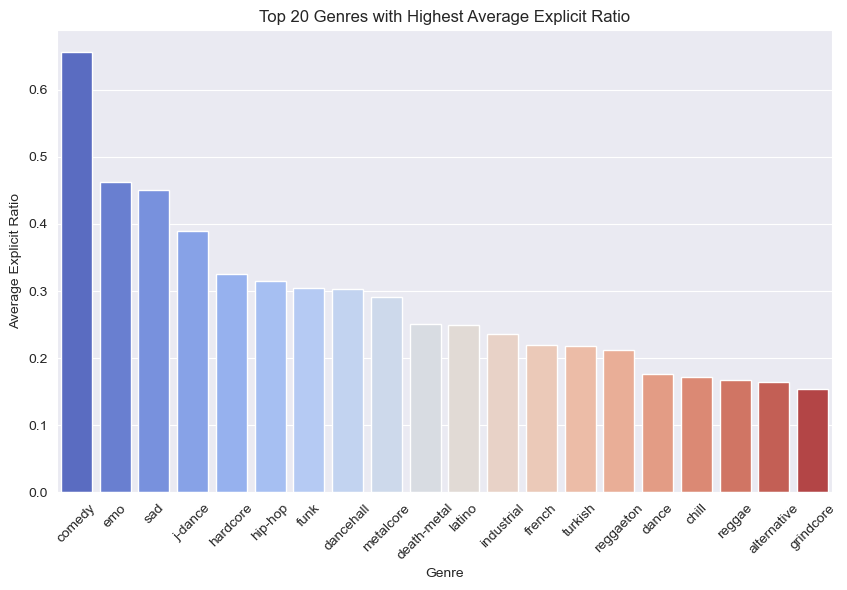

In [42]:
#Chart to show the top 20 genres based on the explicit column

explicit_ratio_by_genre = df.groupby('track_genre')['explicit'].mean().reset_index()
top20_explicit_genres = explicit_ratio_by_genre.nlargest(20, 'explicit')

plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='explicit', data=top20_explicit_genres, palette='coolwarm')
plt.title('Top 20 Genres with Highest Average Explicit Ratio')
plt.xlabel('Genre')
plt.ylabel('Average Explicit Ratio')
plt.xticks(rotation=45)
plt.show()

We can see that comedy genre has the most explicit lyrics on spotify

while some genres like emo,sad,j-dance,hardcore and hip-hop have a decent amount of explicit lyrics, which is understandable based on the genre and it listeners

Grindcore in the top 20 has the least explicit lyrics

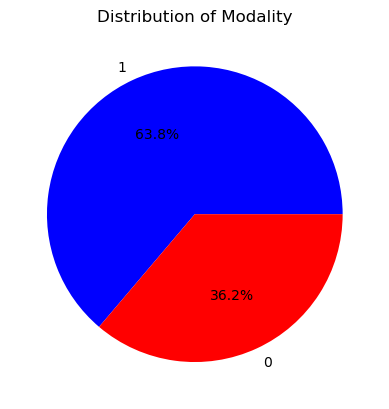

In [33]:
#Pie chart of the percentage amount of explicity in the tracks

mode_counts = df['mode'].value_counts()
colors = ['blue', 'red']
plt.pie(mode_counts.values, labels=mode_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Modality')
plt.show()


Majority (63.8%) of the tracks on spotify modality are Major, while 36.2% of tracks on Spotify modality are Minor.

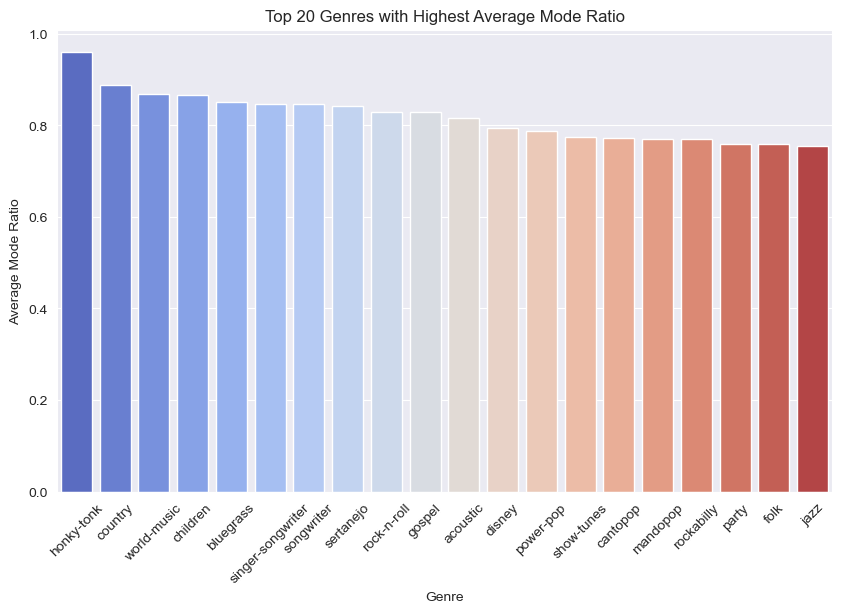

In [43]:
#Chart to show the top 20 genres based on the mode column

mode_ratio_by_genre = df.groupby('track_genre')['mode'].mean().reset_index()
top20_mode_genres = mode_ratio_by_genre.nlargest(20, 'mode')

plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='mode', data=top20_mode_genres, palette='coolwarm')
plt.title('Top 20 Genres with Highest Average Mode Ratio')
plt.xlabel('Genre')
plt.ylabel('Average Mode Ratio')
plt.xticks(rotation=45)
plt.show()

This graph explains well the type and vibe of a music even without having to listen to it first.

Honky-tonk genre which has the highest major key followed by the other top 20 genres which are evenly distributed with the lowest key still around 7 major.


In [34]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
correlation

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007659,0.034176,-0.002249,-0.004277,0.047347,-0.014892,-0.045569,-0.022486,-0.094610,-0.005555,-0.041055,0.012229,0.030508
duration_ms,-0.007659,1.000000,-0.073997,0.058060,0.008560,-0.004232,-0.036032,-0.063157,-0.103636,0.125243,0.010166,-0.154843,0.024334,0.018389
danceability,0.034176,-0.073997,1.000000,0.131782,0.036546,0.256564,-0.069738,0.108206,-0.169246,-0.183924,-0.131622,0.476785,-0.051499,0.207360
energy,-0.002249,0.058060,0.131782,1.000000,0.048063,0.760657,-0.079367,0.142021,-0.732762,-0.180030,0.184794,0.258426,0.247413,0.186708
key,-0.004277,0.008560,0.036546,0.048063,1.000000,0.038342,-0.135789,0.020794,-0.041155,-0.006804,-0.001544,0.034218,0.010957,0.015115
loudness,0.047347,-0.004232,0.256564,0.760657,0.038342,1.000000,-0.042063,0.060088,-0.588140,-0.432124,0.076824,0.279421,0.212214,0.191651
mode,-0.014892,-0.036032,-0.069738,-0.079367,-0.135789,-0.042063,1.000000,-0.046732,0.096547,-0.050826,0.013910,0.021429,0.000403,-0.024352
speechiness,-0.045569,-0.063157,0.108206,0.142021,0.020794,0.060088,-0.046732,1.000000,-0.001339,-0.089194,0.205156,0.036370,0.017191,-0.000411
acousticness,-0.022486,-0.103636,-0.169246,-0.732762,-0.041155,-0.588140,0.096547,-0.001339,1.000000,0.102172,-0.020302,-0.106224,-0.207632,-0.175648
instrumentalness,-0.094610,0.125243,-0.183924,-0.180030,-0.006804,-0.432124,-0.050826,-0.089194,0.102172,1.000000,-0.079875,-0.324342,-0.049960,-0.081936


I want to see the correlation between columns in this dataset. The correlation coefficient measures the strength and direction of the linear relationship between two variables. The values range from -1 (perfect negative correlation) to 1 (perfect positive correlation). 

The columns with the highest correlation are energy and loudness with a correlation of 0.76, energy and acousticness with a correlation of -0.73, and loudness and acousticness with a correlation of -0.58.

Below is the heatmap of the correlation;

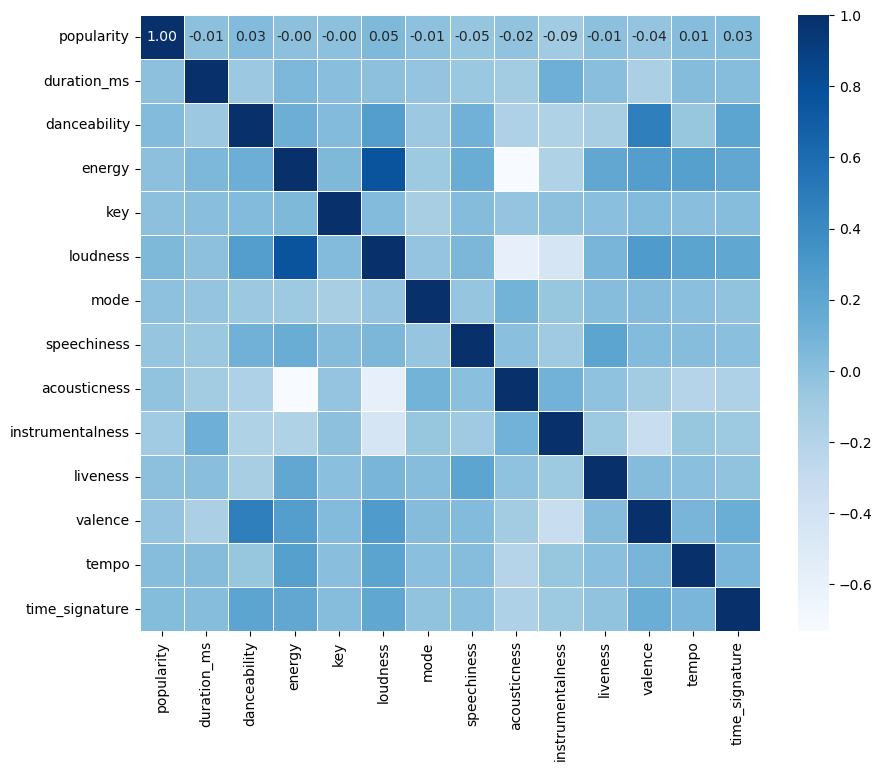

In [35]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.show()


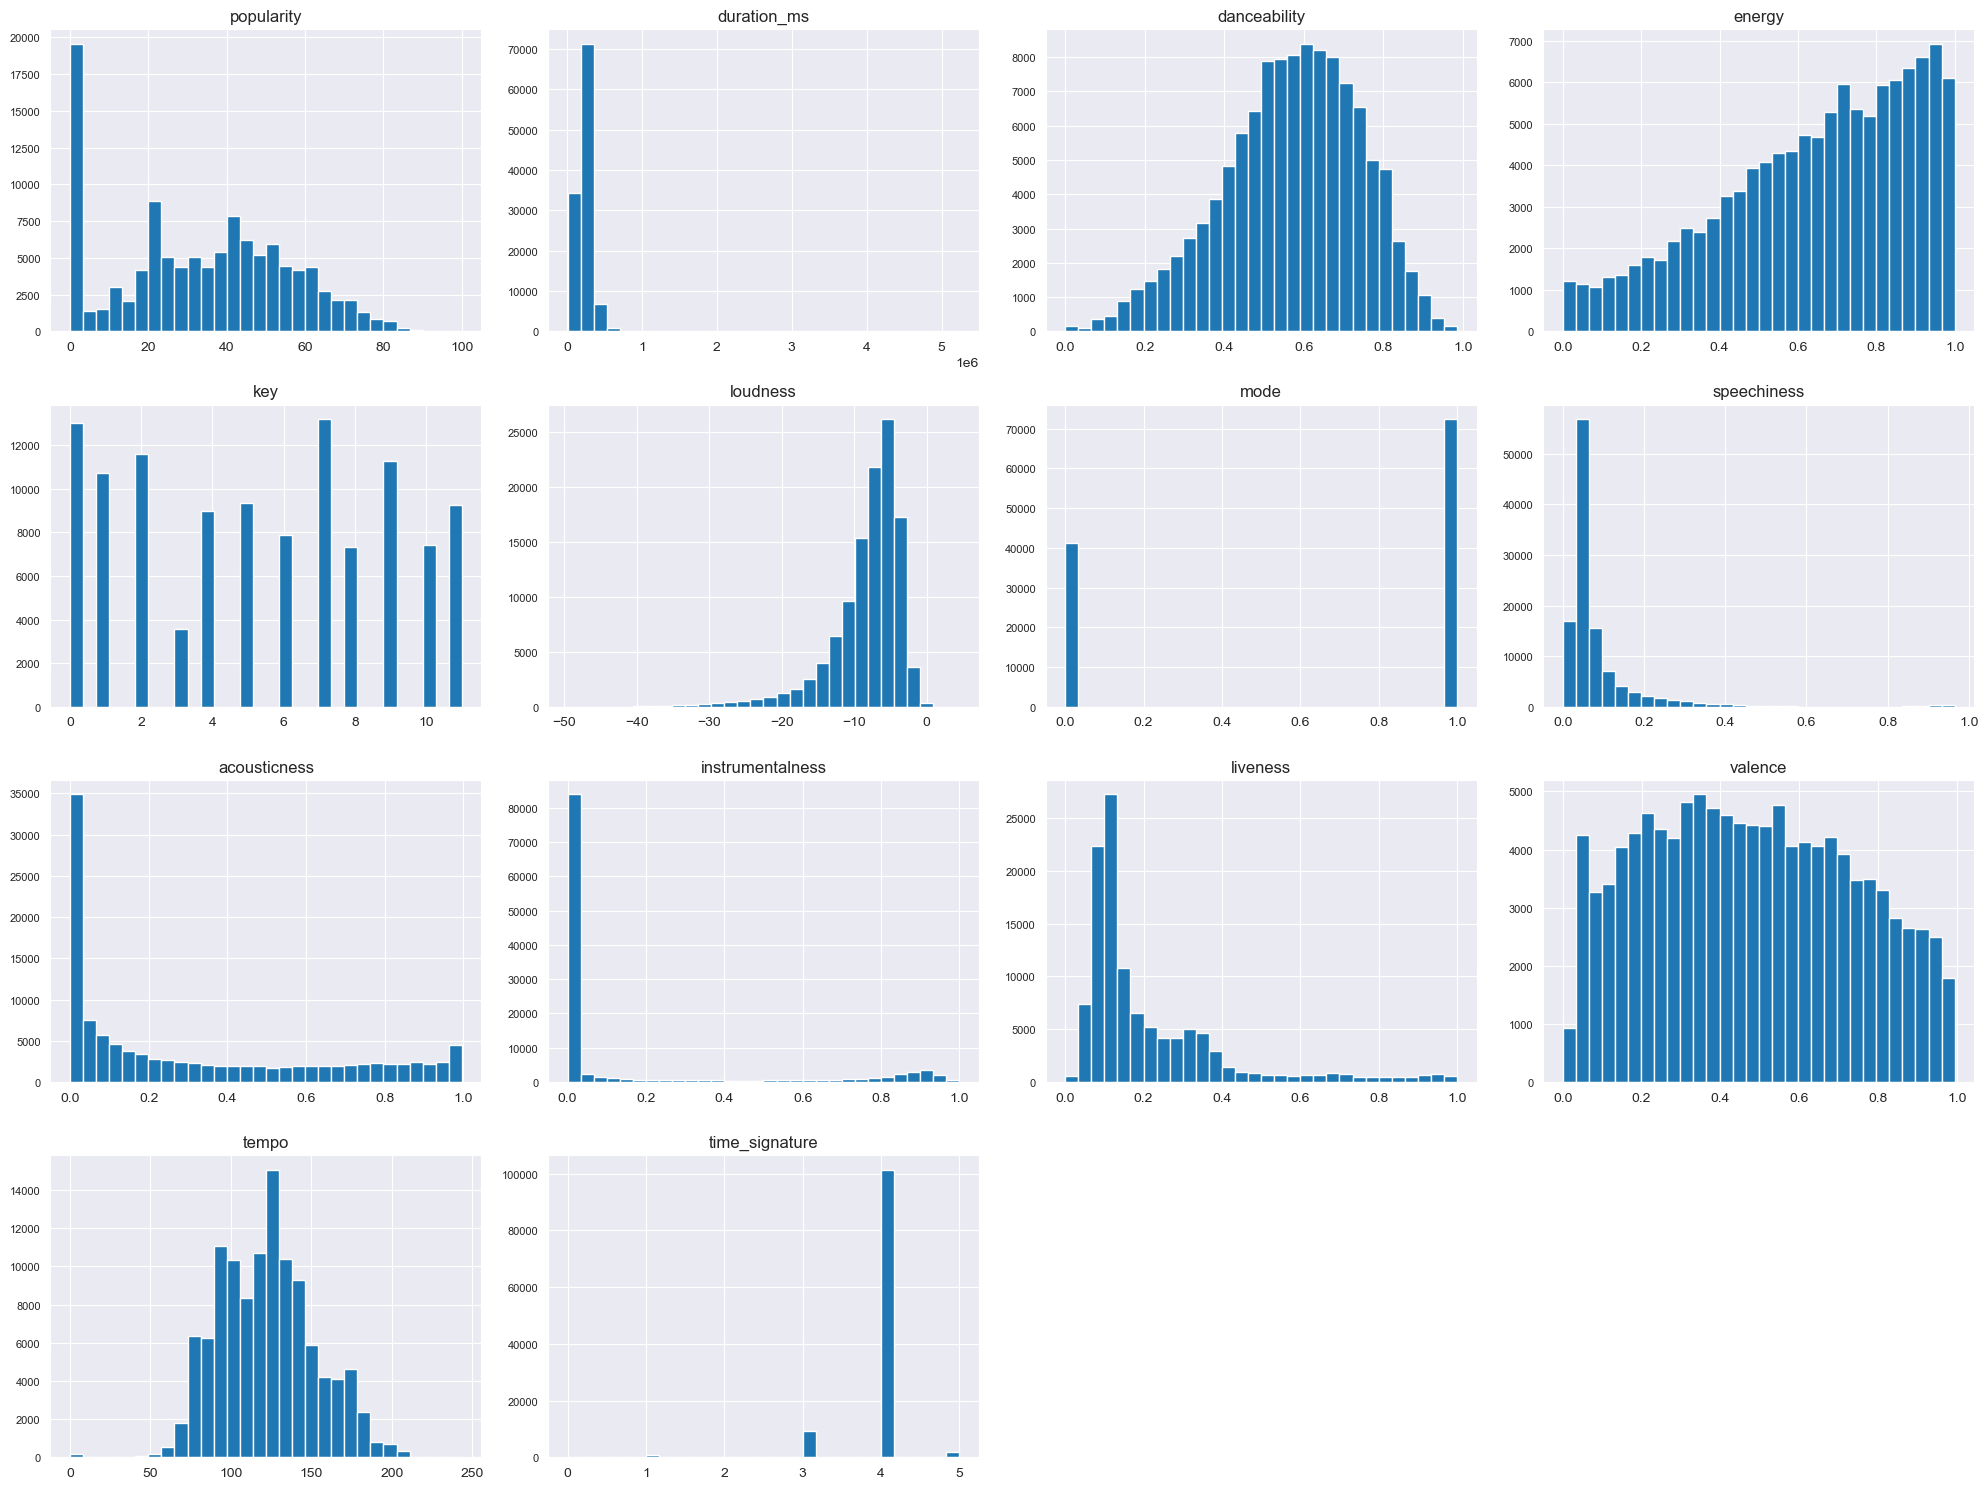

In [39]:
#Check the distribution of the columns

sns.set_style('darkgrid')
df.hist(figsize=(20,15), bins=30, xlabelsize=10, ylabelsize=8)
plt.tight_layout()
plt.show()

* Majority tracks on spotify are of 0 value, while others have normal distribution
* While I can see that a column has boolean e.g True and False, O and 1, as shown in the graph. Mode, highest frequency is 1; major key.
* Danceability, valence and tempo have normal distribution
* Duration_ms, speechiness, acousticness, instrumentalness, and liveness column are right-skewed distributions
* Tracks of 0.5 and above have higher rate of energy
* The key column is somewhat evenly distributed
* Time_signature has distribution is 1.

Text(0.5, 1.0, 'Correlation between Energy and Loudness')

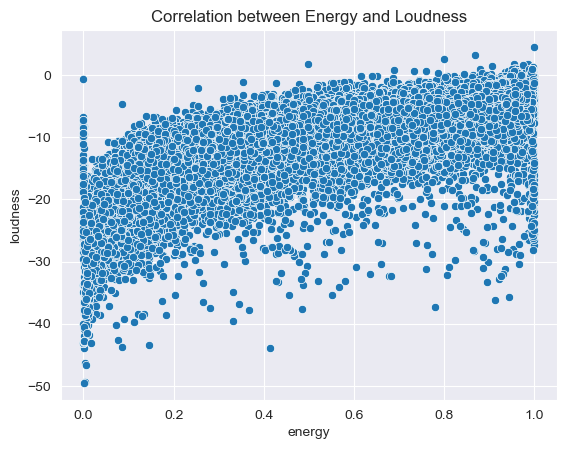

In [46]:
sns.scatterplot(x='energy', y='loudness', data=df)
plt.title('Correlation between Energy and Loudness')


Energy and loudness with a correlation of 0.76, a positive correlation. With this plot I will be able to use it to work with the top 3 genre based on their popularity to check is there is a correction with how the tracks are by ehergy and loudness.

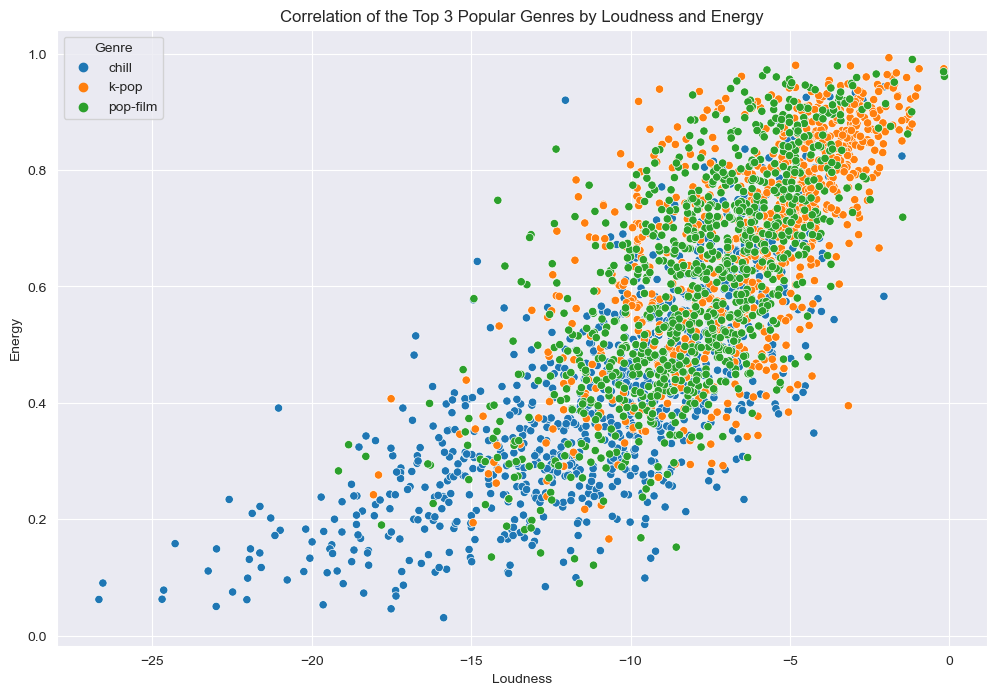

In [48]:
popular_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
top3= popular_genre.nlargest(3, 'popularity')
top3_genre= df[df['track_genre'].isin(top3['track_genre'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=top3_genre)
plt.title('Correlation of the Top 3 Popular Genres by Loudness and Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.legend(title='Genre')

# Show plot
plt.show()

Loudness in this sense is the sound level of each tracks.

Chill has a negative correlation to loudness with few outliners but somewhat equally distributed with energy. Most chill tracks on spotify are not full of energy and definitely no loud vibe.

K-pop has high number of energy distribution of 0.5-1 (more), and few negative correlation with loudness.

Pop-film is the same evalution.


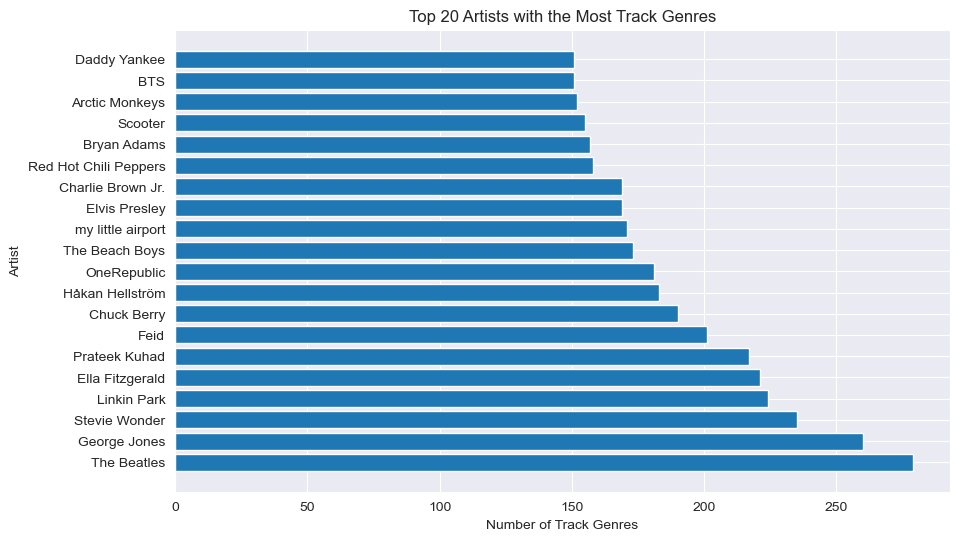

In [71]:
artist_genre_count = df['artists'].value_counts()
top_20_artists = artist_genre_count.nlargest(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_artists.index, top_20_artists.values)
plt.title('Top 20 Artists with the Most Track Genres')
plt.xlabel('Number of Track Genres')
plt.ylabel('Artist')
plt.show()

This is the to show the artist with the amount of genre tracks produced.

But the success of a track is not a full determinant to artists having multiple genre tracks, but can also be helpful at the same time for artists to include different genres in their albums.

# What made the top 3 tracks on spotify popular?
The top 3 tracks are 
* Pop-film
* K-pop
* Chill

  There are different factor involved; some that are not in the dataset might be the geographical area, audience, and etc. But from the ones we've done so far we see that the mood of the track is a determinant to the popularity(energy, liveness, key...), the artists too can be one of the big factors to the success of a track. Lets check artists that made the most popular tracks among the top 3 genres;
  

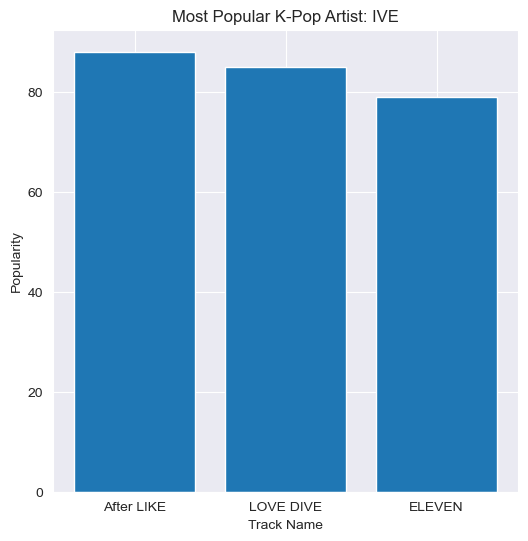

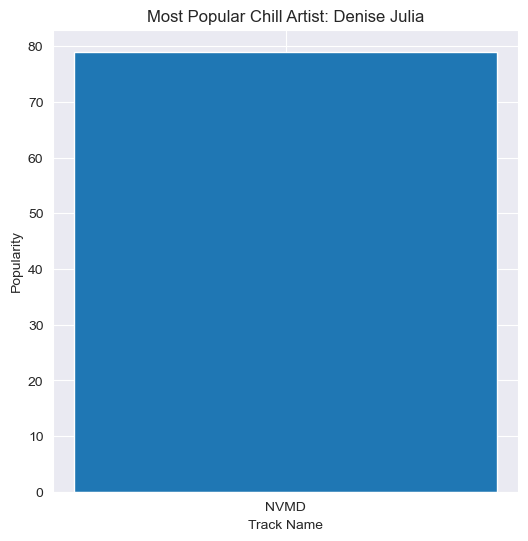

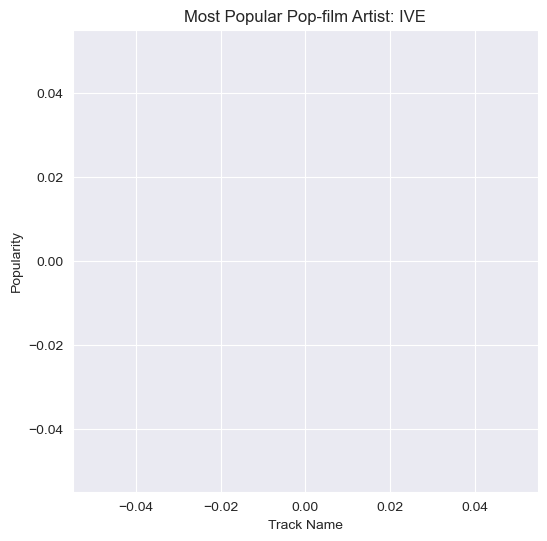

In [81]:
kpop_tracks = df[df['track_genre'] == 'k-pop']
kpop_artists = kpop_tracks.groupby('artists')['popularity'].mean().reset_index()
most_popular_kpop_artist = kpop_artists.loc[kpop_artists['popularity'].idxmax()]['artists']
most_popular_kpop_tracks = kpop_tracks[kpop_tracks['artists'] == most_popular_kpop_artist]

plt.figure(figsize=(6, 6))
plt.bar(most_popular_kpop_tracks['track_name'], most_popular_kpop_tracks['popularity'])
plt.title(f'Most Popular K-Pop Artist: {most_popular_kpop_artist}')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.show()

chill_tracks = df[df['track_genre'] == 'chill']
chill_artists = chill_tracks.groupby('artists')['popularity'].mean().reset_index()
most_popular_chill_artist = chill_artists.loc[chill_artists['popularity'].idxmax()]['artists']
most_popular_chill_tracks = chill_tracks[chill_tracks['artists'] == most_popular_chill_artist]

plt.figure(figsize=(6, 6))
plt.bar(most_popular_chill_tracks['track_name'], most_popular_chill_tracks['popularity'])
plt.title(f'Most Popular Chill Artist: {most_popular_chill_artist}')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.show()

popfilm_tracks = df[df['track_genre'] == 'pop-film']
popfilm_artists = kpop_tracks.groupby('artists')['popularity'].mean().reset_index()
most_popular_popfilm_artist = popfilm_artists.loc[popfilm_artists['popularity'].idxmax()]['artists']
most_popular_popfilm_tracks = popfilm_tracks[popfilm_tracks['artists'] == most_popular_popfilm_artist]

plt.figure(figsize=(6, 6))
plt.bar(most_popular_popfilm_tracks['track_name'], most_popular_popfilm_tracks['popularity'])
plt.title(f'Most Popular Pop-film Artist: {most_popular_popfilm_artist}')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.show()